<a href="https://colab.research.google.com/github/XShawn1/Bayes_ARP_Abarth_1/blob/main/Mini_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install gensim
!pip install matplotlib
!pip install pyLDAvis
!pip install nltk

2023-08-30 15:05:59.421501: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 15:06:01.781427: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installatio

In [1]:
import pandas as pd
import string
import spacy
import gensim
from gensim.models.phrases import Phrases, Phraser
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from spacy.lang.en.stop_words import STOP_WORDS
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving mergedmini.csv to mergedmini.csv


In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('mergedmini.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# NLP Pre-processing
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Tokenization, noise removal, and text cleaning processes
def clean_text(text):
    doc = nlp(text)
    cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha and len(token) > 2]
    return cleaned_tokens

cleaned_comments = [clean_text(comment) for comment in df['Comment']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Add custom stopwords
custom_stopwords = {"mini", "ev", "electric", "car", "cooper", "Beatle", "sorry", "friend", "old", "flag", "self", "convertible", "BMW", "thank", "bacteria", "touchscreen", "lose", "thread", "hand", "bet", "Elon", "contradiction", "John", "leaf", "instead", "book", "scrub", "millen", "Mini", "Maxi", "Cooper", "rumblestripe", "MINI", "bit", "morning", "thing", "actually", "stick", "George", "Paul", "scream", "think", "month", "pedant", "write", "ice", "IMHO", "german", "british", "grille",
                    "Robux", "second", "lease", "money", "weekend", "backwards", "home", "bev", "throw", "con", "EVs", "know", "decide", "petrol", "understand", "win", "far", "plastic", "match", "Tusk", "centre", "console", "obligatory", "oblige", "step", "people", "speak", "comment", "plain", "wealthy", "vinyl", "add", "gag", "mouth", "DonkeyApple", "Earthdweller", "monthly", "fiat", "come", "understand", "believe", "extra", "outside", "end", "Model", "house", "planet", "necessarily", "especially",
                    "thank", "WLTP", "differ", "reckon", "brum", "easily", "hour", "RWD", "world", "stick", "brmm", "mention", "add", "winter", "plenty", "Ireland", "wonder", "SDK", "folk", "choose", "form", "physical", "certainly", "guy", "KaraK", "aka", "blame", "crude", "gimmick", "Thursday", "Europe", "London", "bethis", "grill", "Minis", "Germans", "Bacteria", "impregnate", "Mrs", "app", "greeting", "Mouse", "Rat"}
all_stopwords = STOP_WORDS.union(custom_stopwords)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Remove stopwords from the cleaned tokens
cleaned_comments = [[token for token in tokens if token not in all_stopwords] for tokens in cleaned_comments]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Creating bigram models and applying to comments
bigram = Phrases(cleaned_comments, min_count=5, threshold=10)
bigram_mod = Phraser(bigram)
comments_bigrams = [bigram_mod[comment] for comment in cleaned_comments]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Creating dictionary and corpus
id2word = corpora.Dictionary(comments_bigrams)
corpus = [id2word.doc2bow(text) for text in comments_bigrams]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Creating the LDA Model
num_topics = 3  # Experiment with different numbers
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Print the topics and their top words
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=True)
for topic_num, topic_words in topics:
    print(f"Topic {topic_num + 1}: {topic_words}")

Topic 1: 0.015*"like" + 0.012*"look" + 0.011*"model" + 0.010*"design" + 0.010*"interior" + 0.008*"great" + 0.008*"new" + 0.008*"styling" + 0.008*"current" + 0.007*"wide"
Topic 2: 0.026*"mile" + 0.020*"range" + 0.011*"good" + 0.011*"drive" + 0.010*"need" + 0.009*"like" + 0.008*"buy" + 0.008*"charge" + 0.007*"look" + 0.007*"year"
Topic 3: 0.029*"look" + 0.018*"wheel" + 0.016*"like" + 0.010*"new" + 0.009*"seat" + 0.009*"steering" + 0.009*"drive" + 0.009*"present" + 0.008*"way" + 0.007*"buy"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Extract the top words and their weights from topics
topic_words_and_weights = [topic[1].split(" + ") for topic in topics]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Extract word weights and words for each topic
word_weights = []
topic_labels = []

for i, words_and_weights in enumerate(topic_words_and_weights):
    words = [word.split("*")[1].strip() for word in words_and_weights]
    weights = [float(word.split("*")[0]) for word in words_and_weights]
    word_weights.append(weights)
    topic_labels.append(f"Topic {i + 1}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


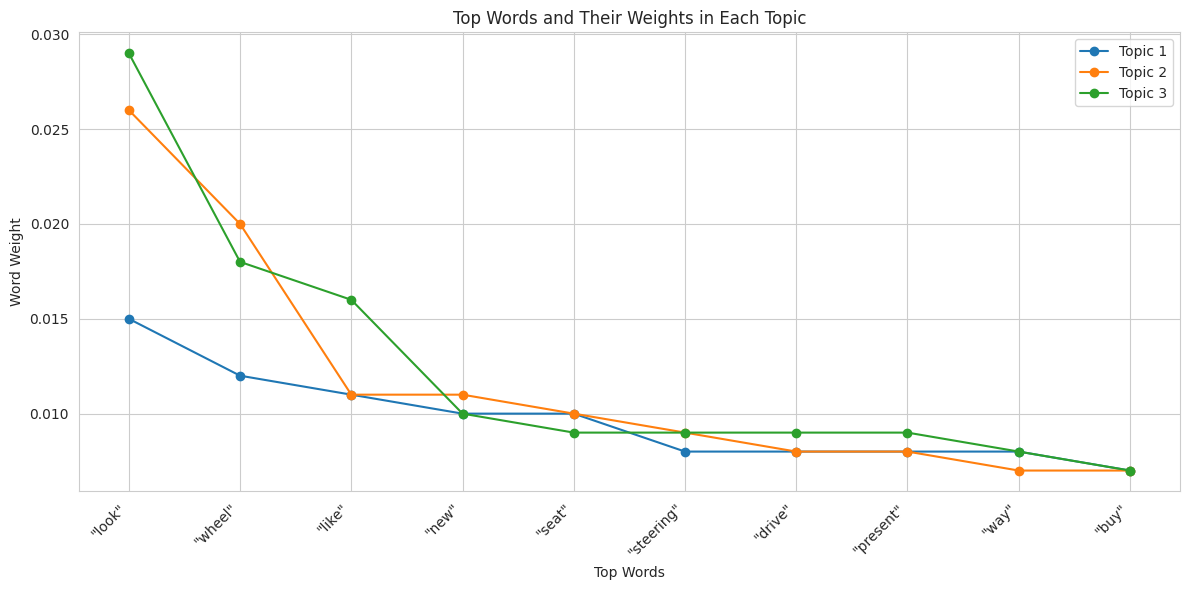

In [33]:
# Create a line chart
plt.figure(figsize=(12, 6))

for i, (weights, label) in enumerate(zip(word_weights, topic_labels)):
    plt.plot(weights, label=label, marker='o')

plt.xticks(range(len(words)), words, rotation=45, ha='right')
plt.xlabel('Top Words')
plt.ylabel('Word Weight')
plt.title('Top Words and Their Weights in Each Topic')
plt.legend()
plt.tight_layout()

plt.show()

In [12]:
# Calculate Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned_comments, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_lda}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.4249206887940022


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.ap

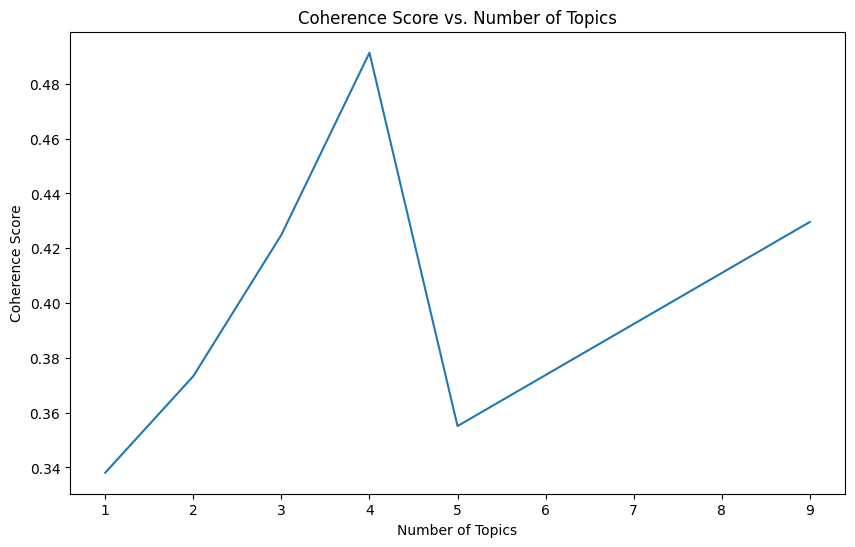

In [13]:
# Visualizing the Coherence Scores
coherence_scores = []
for num_topics in range(1, 10):
    lda_model = gensim.models.LdaModel(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )
    coherence_model = CoherenceModel(model=lda_model, texts=cleaned_comments, dictionary=id2word, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 10), y=coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

In [14]:
# PyLDAvis Visualization
lda_vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
from tabulate import tabulate

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Create a list to store document data
document_data = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Loop through documents and their topics
for doc_idx, doc_topics in enumerate(lda_model.get_document_topics(corpus)):
    topics_str = ", ".join([f"{topic_idx}:{prob:.4f}" for topic_idx, prob in doc_topics])
    document_data.append([doc_idx + 1, topics_str])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Define table headers
headers = ["Document", "Topics and Scores"]

# Print the table using tabulate
table = tabulate(document_data, headers=headers, tablefmt="pretty")
print(table)

+----------+------------------------------------------------------------------------------------------+
| Document |                                    Topics and Scores                                     |
+----------+------------------------------------------------------------------------------------------+
|    1     |                                    2:0.7526, 5:0.2285                                    |
|    2     |                               4:0.8013, 5:0.0737, 6:0.1129                               |
|    3     |                                    2:0.4714, 5:0.5172                                    |
|    4     |      0:0.0112, 2:0.0159, 3:0.0345, 4:0.0153, 5:0.0577, 6:0.0242, 7:0.0250, 8:0.8075      |
|    5     |                                    4:0.8044, 5:0.1706                                    |
|    6     |                     3:0.0146, 5:0.0233, 6:0.9164, 7:0.0106, 8:0.0135                     |
|    7     |                                    5:0.0164, 6:0.94

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
#'Date' and 'Comment' columns
df['Date'] = df['Date'].apply(lambda x: parser.parse(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Group comments by month-year and count the number of comments in each group
comments_by_month = df.groupby(df['Date'].dt.to_period("M")).size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Print the summary of comments by month
print("Timeline of Comments:")
for period, count in comments_by_month.items():
    print(f"{period.to_timestamp().strftime('%b %Y')}: {count} comments")

Timeline of Comments:
Feb 2020: 69 comments
Mar 2020: 19 comments
Jun 2020: 4 comments
Jul 2021: 4 comments
Oct 2021: 26 comments
Nov 2021: 25 comments
Dec 2021: 16 comments
Jul 2022: 40 comments
Aug 2022: 2 comments
Oct 2022: 1 comments
Feb 2023: 99 comments
Mar 2023: 1 comments
Apr 2023: 5 comments


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


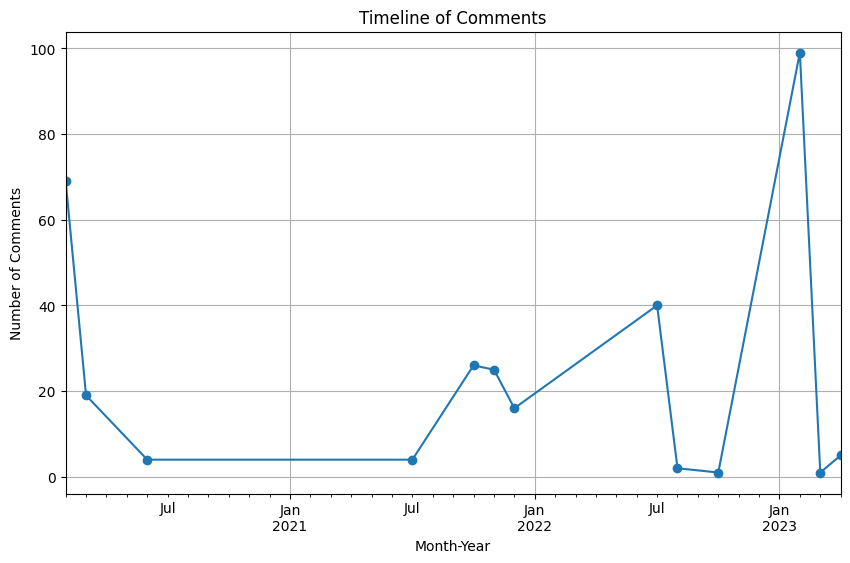

In [22]:
# Plotting the timeline graph
plt.figure(figsize=(10, 6))
comments_by_month.plot(kind='line', marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Number of Comments')
plt.title('Timeline of Comments')
plt.grid(True)
plt.show()

In [23]:
# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [24]:
# List to store sentiment labels for each comment
sentiments = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Perform sentiment analysis on each comment
for comment in cleaned_comments:
    sentiment_scores = sid.polarity_scores(" ".join(comment))

    # Determine sentiment label based on compound score
    if sentiment_scores['compound'] >= 0.05:
        sentiment = "Positive"
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    sentiments.append(sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Add the calculated sentiments to the DataFrame (assuming you have a DataFrame named df)
df = pd.DataFrame({'Comment': cleaned_comments})
df['Sentiment'] = sentiments

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Analyze and visualize overall sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts(normalize=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Define custom colors
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Green, Orange, Blue

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in 

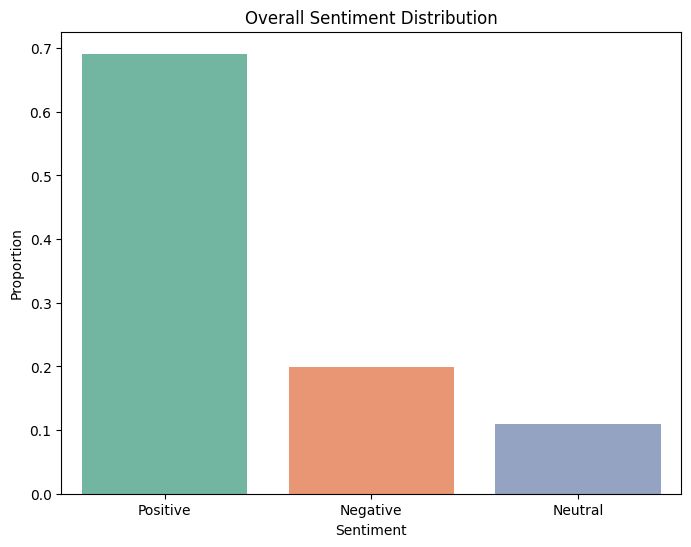

In [29]:
# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette=colors)

# Set labels and title
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.title('Overall Sentiment Distribution')

# Customize the style
sns.set_style("whitegrid")
plt.xticks(rotation=0)  # To make x-axis labels more readable

# Show the plot
plt.show()

In [30]:
# Print sentiment distribution
for sentiment, proportion in sentiment_distribution.items():
    print(f"{sentiment}: {proportion:.2%}")

Positive: 69.13%
Negative: 19.94%
Neutral: 10.93%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
